# Section 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## JOLTS Survey

In [3]:
import os
import re
from IPython.display import display

In [11]:
for dirname, _, filenames in os.walk('.'):
    for filename in sorted(filenames):
        if dirname.startswith('./.') or filename.startswith('.'): continue
        print('\t', os.path.join(dirname, filename))

	 ./Calls_for_Service_2016.csv
	 ./Calls_for_Service_2017.csv
	 ./Calls_for_Service_2018.csv
	 ./Calls_for_Service_2019.csv
	 ./Calls_for_Service_2020.csv
	 ./CapstoneProposal.ipynb
	 ./CodingChallenges.ipynb
	 ./DataIncubatorChallenge.ipynb
	 ./JOLTS_AllData.txt
	 ./JOLTS_DataElementCodeMap.txt
	 ./JOLTS_IndustryCodeMap.txt
	 ./JOLTS_PeriodCodeMap.txt
	 ./JOLTS_RateLevelCodeMap.txt
	 ./JOLTS_SeasonalCodeMap.txt
	 ./JOLTS_SizeClassCodeMap.txt
	 ./LinkedIn_CompanyData.csv
	 ./LinkedIn_CompanyData_Cleaned.csv
	 ./LinkedIn_CompanySummary.tsv
	 ./README.md
	 ./temp_datalab_records_linkedin_company.zip
	 ./images/jolts_2020_vtl_breakdown.png
	 ./images/jolts_2020_vtr_stack.png
	 ./images/jolts_vtr_scaled_vs_time.png
	 ./images/jolts_vtr_vs_time.png
	 ./images/test.png
	 ./images/turnover_vs_growth.png


In [12]:
filepath = './JOLTS_AllData.txt'
df_bls = pd.read_csv(filepath, delimiter='\t')
df_bls.columns = df_bls.columns.str.strip()

In [13]:
df_bls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229172 entries, 0 to 229171
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   series_id       229172 non-null  object 
 1   year            229172 non-null  int64  
 2   period          229172 non-null  object 
 3   value           229172 non-null  float64
 4   footnote_codes  913 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.7+ MB


In [14]:
df_bls.head()

,series_id,year,period,value,footnote_codes
0,JTS000000000000000HIL,2000,M12,5426.0,NaN
1,JTS000000000000000HIL,2001,M01,5722.0,NaN
2,JTS000000000000000HIL,2001,M02,5303.0,NaN
3,JTS000000000000000HIL,2001,M03,5528.0,NaN
4,JTS000000000000000HIL,2001,M04,5204.0,NaN


In [15]:
industry_map = pd.read_csv('JOLTS_IndustryCodeMap.txt', delimiter='\t').set_index('industry_code')['industry_text']
element_map = pd.read_csv('JOLTS_DataElementCodeMap.txt', delimiter='\t').set_index('dataelement_code')['dataelement_text']
sizeclass_map = pd.read_csv('JOLTS_SizeClassCodeMap.txt', delimiter='\t').set_index('sizeclass_code')['sizeclass_text']

print('='*20, " Code Maps ", '='*20)

print('\nMain Data Fields')
display(element_map.to_frame())

print('\nSize Class')
display(sizeclass_map.to_frame())

print('\nIndustry Types')
display(industry_map.to_frame())

====================  Code Maps  ====================

Main Data Fields


,dataelement_text
dataelement_code,
HI,Hires
JO,Job openings
LD,Layoffs and discharges
OS,Other separations
QU,Quits
TS,Total separations
UN,Unemployment rate
UO,Unemployed persons per job opening ratio



Size Class


,sizeclass_text
sizeclass_code,
0,All size classes
1,1 to 9 employees
2,10 to 49 employees
3,50 to 249 employees
4,250 to 999 employees
5,"1,000 to 4,999 employees"
6,"5,000 or more employees"



Industry Types


,industry_text
industry_code,
0,Total nonfarm
100000,Total private
110099,Mining and logging
230000,Construction
300000,Manufacturing
320000,Durable goods manufacturing
340000,Nondurable goods manufacturing
400000,"Trade, transportation, and utilities"
420000,Wholesale trade


**Industry Groupings**
* Total nonfarm
    * Total private
        * Mining and logging
        * Construction
        * Manufacturing
            * Durable goods manufacturing
            * Nondurable goods manufacturing
        * Trade, transportation, and utilities
            * Wholesale trade
            * Retail trade
            * Transportation, warehousing, and utilities
        * Information
        * Financial activities
            * Finance and insurance
            * Real estate and rental and leasing
        * Professional and business services
        * Education and health services
            * Educational services
            * Health care and social assistance
        * Leisure and hospitality
            * Arts, entertainment, and recreation
            * Accommodation and food services
        * Other services
    * Government
        * Federal
        * State and local
            * State and local government education
            * State and local government, excluding education

In [17]:
PRIVATE_IND = [
        '110099', # Mining and logging
        '230000', # Construction
        '300000', # Manufacturing
        '400000', # Trade, transportation, and utilities
        '510000', # Information
        '510099', # Financial activities
        '540099', # Professional and business services
        '600000', # Education and health services
        '700000', # Leisure and hospitality
        '810000', # Other services
    ]

In [18]:
codes = df_bls[df_bls.columns[0]].str.extract(r'''
([\w]{2})  # 1 Survey
([\w]{1})  # 2 Seasonal
([\w]{6})  # 3 Industry 
([\w]{2})  # 4 State
([\w]{5})  # 5 Area
([\w]{2})  # 6 Size Class
([\w]{2})  # 7 Data Element
([\w]{1})  # 8 Rate/Level
''', re.VERBOSE).rename(columns=
{
    0 : 'Survey',
    1 : 'Seasonal',
    2 : 'Industry',
    3 : 'State',
    4 : 'Area',
    5 : 'Size Class',
    6 : 'Data Element',
    7 : 'Rate/Level'
})
codes.head()

,Survey,Seasonal,Industry,State,Area,Size Class,Data Element,Rate/Level
0,JT,S,000000,00,00000,00,HI,L
1,JT,S,000000,00,00000,00,HI,L
2,JT,S,000000,00,00000,00,HI,L
3,JT,S,000000,00,00000,00,HI,L
4,JT,S,000000,00,00000,00,HI,L


In [19]:
for c in codes.columns:
    print(f'{c: <15}',':',', '.join(codes[c].unique()))

Survey          : JT
Seasonal        : S, U
Industry        : 000000, 100000, 110099, 230000, 300000, 320000, 340000, 400000, 420000, 440000, 480099, 510000, 510099, 520000, 530000, 540099, 600000, 610000, 620000, 700000, 710000, 720000, 810000, 900000, 910000, 920000, 923000, 929000
State           : 00, MW, NE, SO, WE
Area            : 00000
Size Class      : 00, 01, 02, 03, 04, 05, 06
Data Element    : HI, JO, LD, OS, QU, TS, UO
Rate/Level      : L, R


In [20]:
date = pd.concat([
    df_bls['year'].astype(int),
    df_bls['period'].str[1:].astype(int)], axis=1
).rename(columns={'period':'month'})
date['day'] = 1
for c in date.columns:
    print(c,':',date[c].unique())
date['month'] = date['month'].where(date['month']<=12, 1)
date = pd.to_datetime(date).rename(index='Date')

year : [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]
month : [12  1  2  3  4  5  6  7  8  9 10 11 13]
day : [1]


In [21]:
df_bls_clean = pd.concat([
    codes,
    date,
    df_bls[['year','period','value']]
], axis=1).sort_values('Industry')
df_bls_clean.sample(10)

,Survey,Seasonal,Industry,State,Area,Size Class,Data Element,Rate/Level,Date,year,period,value
206748,JT,U,710000,00,00000,00,TS,L,2000-12-01,2000,M12,99.0
39953,JT,S,230000,00,00000,00,OS,L,2016-01-01,2016,M01,13.0
30605,JT,S,100000,00,00000,05,LD,L,2009-09-01,2009,M09,82.0
167532,JT,U,420000,00,00000,00,JO,R,2013-04-01,2013,M04,2.5
83910,JT,S,620000,00,00000,00,OS,L,2019-02-01,2019,M02,44.0
130142,JT,U,100000,00,00000,00,TS,R,2010-01-01,2010,M13,41.2
150116,JT,U,110099,00,00000,00,QU,L,2016-05-01,2016,M05,12.0
96270,JT,S,810000,00,00000,00,QU,R,2012-02-01,2012,M02,1.6
172511,JT,U,440000,00,00000,00,TS,L,2014-02-01,2014,M02,598.0
29346,JT,S,100000,00,00000,04,TS,R,2006-06-01,2006,M06,4.3


In [22]:
# df_bls_clean[
#          (df_bls_clean['State']!='00')
#        & (df_bls_clean['period']== 'M13')
#        & (df_bls_clean['year']== 2020)
#        & (df_bls_clean['Rate/Level'] == 'R')
#        & (df_bls_clean['Data Element'] == 'QU')
#        # Industry == 000000
#        # Size Class == 00
# ]

df_bls_clean[
         (df_bls_clean['Size Class']=='06')
       & (df_bls_clean['Seasonal']== 'S')
       #& (df_bls_clean['period']== 'M12')
       & (df_bls_clean['year']== 2020)
       & (df_bls_clean['Rate/Level'] == 'R')
       & (df_bls_clean['Data Element'] == 'QU')
       # Industry == 100000
       # State == 00
       # Period != M13
]

,Survey,Seasonal,Industry,State,Area,Size Class,Data Element,Rate/Level,Date,year,period,value
34877,JT,S,100000,00,00000,06,QU,R,2020-01-01,2020,M01,1.1
34878,JT,S,100000,00,00000,06,QU,R,2020-02-01,2020,M02,1.1
34879,JT,S,100000,00,00000,06,QU,R,2020-03-01,2020,M03,1.2
34880,JT,S,100000,00,00000,06,QU,R,2020-04-01,2020,M04,1.0
34881,JT,S,100000,00,00000,06,QU,R,2020-05-01,2020,M05,0.8
34882,JT,S,100000,00,00000,06,QU,R,2020-06-01,2020,M06,0.9
34884,JT,S,100000,00,00000,06,QU,R,2020-08-01,2020,M08,0.9
34885,JT,S,100000,00,00000,06,QU,R,2020-09-01,2020,M09,1.2
34886,JT,S,100000,00,00000,06,QU,R,2020-10-01,2020,M10,1.2
34887,JT,S,100000,00,00000,06,QU,R,2020-11-01,2020,M11,1.0


In [23]:
def summarize_turnover(df_clean, select_ind, private_ind):
    ref_year = 2020
    ref_industry = '100000'

    industry_rank = dict(zip(industry_map.index, range(len(industry_map))))
    df_clean['Industry_rank'] = df_clean['Industry'].map(industry_rank)
    select_ind.sort(key=lambda x : industry_rank[int(x)], reverse=True)
    private_ind.sort(key=lambda x : industry_rank[int(x)], reverse=False)
    
    # Pie chart of Voluntary Turnover Levels in major Nonfarm industries
    fig, ax = plt.subplots()
    filt = ((df_clean['Seasonal']     == 'U' )
          & (df_clean['period']       == 'M13')
          & (df_clean['year']         == ref_year)
          & (df_clean['Rate/Level']   == 'L')
          & (df_clean['Data Element'] == 'QU')
          & (df_clean['Industry'].isin(private_ind)))
    df = df_clean[filt].sort_values('Industry_rank')
    labels = [industry_map[int(l)] for l in private_ind]
    ax.pie(df['value'].values, labels=labels, autopct='%.0f%%', radius=1)
    ax.set_title('Composition of 2020 Voluntary Turnover Levels\nin Private Sector Industries')
    plt.show()

    # Breakdown of turnover rates (Stacked Bar Plot)
    fig, ax = plt.subplots()
    filt = ((df_clean['Seasonal']     == 'U' )
          & (df_clean['State']        == '00')
          & (df_clean['Size Class']   == '00')
          & (df_clean['period']       == 'M13')
          #& (df_clean['year']         == 2020)
          & (df_clean['Rate/Level']   == 'R')
          #& (df_clean['Data Element'] == 'QU')
          & (df_clean['Industry'].isin(select_ind)))
    
    df = df_clean[filt & (df_clean['year'] == ref_year)].sort_values('Industry_rank')
    qu_vals = df[df['Data Element'] == 'QU']['value'].values[::-1]
    ld_vals = df[df['Data Element'] == 'LD']['value'].values[::-1]
    os_vals = df[df['Data Element'] == 'OS']['value'].values[::-1]
    ax.barh(select_ind, qu_vals, label='Voluntary')
    ax.barh(select_ind, ld_vals, label='Involuntary', left=qu_vals)
    ax.barh(select_ind, os_vals, label='Other', left=[a+b for a,b in zip(qu_vals,ld_vals)])
    ax.legend()
    ax.set_xlabel('Turnover Rate (%)')
    ax.set_ylabel('Industry')
    labels = [industry_map[int(x)] for x in select_ind]
    ax.set_title("2020 Turnover Rates")
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(labels)
    plt.show()

    # Change in VTR over time
    fig, ax = plt.subplots()
    df = df_clean[filt & (df_clean['Data Element'] == 'QU')].sort_values('Industry_rank')
    ax = sns.lineplot(data=df, x='Date', y='value', hue='Industry')
    ax.set_title('Change in Voluntary Turnover Rates')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rate (%)')
    handles, labels = ax.get_legend_handles_labels()
    labels = [industry_map[int(l)] for l in labels]
    ax.legend(handles=handles, labels=labels, loc='center left', bbox_to_anchor=(1.05,0.5), ncol=1)
    plt.show()

    # Change in VTR over time w.r.t reference industry
    df = df_clean[filt & (df_clean['Data Element'] == 'QU')].sort_values('Industry_rank')
    ref_map = df.loc[df['Industry']==ref_industry].set_index('year')['value']
    df.loc[:,'value_adj'] = df.loc[:,'year'].map(ref_map).sub(df.loc[:,'value']) * -1
    ax = sns.lineplot(data=df, x='Date', y='value_adj', hue='Industry')
    ref_industry = industry_map[int(ref_industry)]
    ax.set_title(f'Change in Voluntary Turnover Rates \nw.r.t "{ref_industry}"')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'Rate Difference')       
    handles, labels = ax.get_legend_handles_labels()
    labels = [industry_map[int(l)] for l in labels]
    ax.legend(handles=handles, labels=labels, loc='center left', bbox_to_anchor=(1.05,0.5), ncol=1)
    plt.show()
    

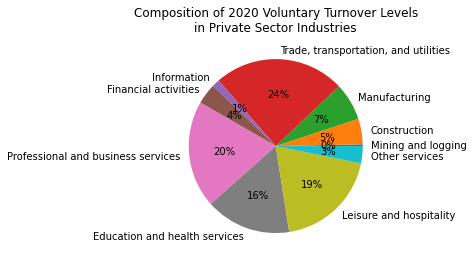

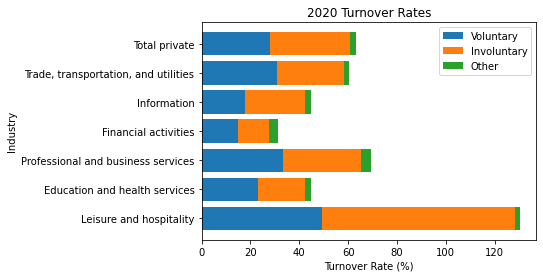

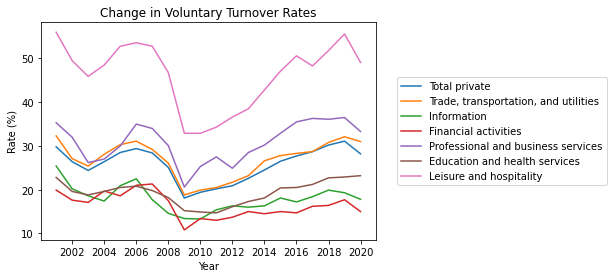

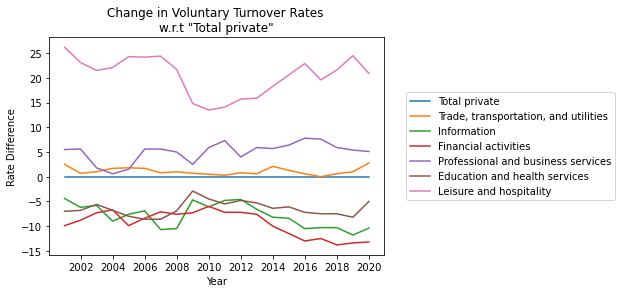

In [24]:
industries = [
    #'000000' , # Total Nonfarm
    '100000', # Total private
    #'110099', # Mining and logging
    #'230000', # Construction
    #'300000', # Manufacturing
    #'320000', # Durable goods manufacturing
    #'340000', # Nondurable goods manufacturing
    '400000', # Trade, transportation, and utilities
    #'420000', # Wholesale trade
    #'440000', # Retail trade
    #'480099', # Transportation, warehousing, and utilities
    '510000', # Information
    '510099', # Financial activities
    #'520000', # Finance and insurance
    #'530000', # Real estate and rental and leasing
    '540099', # Professional and business services
    '600000', # Education and health services
    #'610000', # Educational services
    #'620000', # Health care and social assistance
    '700000', # Leisure and hospitality
    #'710000', # Arts, entertainment, and recreation
    #'720000', # Accommodation and food services
    #'810000', # Other services
    #'900000', # Government
    #'910000', # Federal
    #'920000', # State and local
    #'923000', # State and local government education
    #'929000', # State and local government, excluding education
]
summarize_turnover(df_bls_clean, industries, PRIVATE_IND)

## LinkedIn Dataset

+ dataset_id
+ as_of_date
+ company_name
+ followers_count
+ employees_on_platform
+ link
+ industry
+ date_added
+ date_updated

All Null
+ description
+ website
+ entity_id
+ cusip
+ isin

Notes
* Different companies with same name exist. Use ID to distinguish

In [28]:
%%time
file_dir = './'
file_name = 'LinkedIn_CompanyData.csv'
filepath = file_dir + file_name
usecols=['dataset_id',
         #'as_of_date', # same as date_updated?
         'company_name',
         'employees_on_platform',
         'followers_count',
         'industry',
         #'date_added', # same as date_updated?
         'date_updated'
        ]
dtype = {
    'dataset_id'            : int,
    'company_name'          : str,
    'employees_on_platform' : int,
    'followers_count'       : int,
    'industry'              : str,
    'date_updated'          : 'object'    
}
parse_dates = ['date_updated']
df_pre = pd.read_csv(filepath, usecols=usecols, 
                     parse_dates=parse_dates, infer_datetime_format=True,
                     #nrows=100000
                    )

df_pre['company_name'] = df_pre['company_name'].str.replace('&amp;','&')
df_pre['industry'] = df_pre['industry'].str.replace('&amp;','&')
df_pre['industry'] = df_pre.groupby('dataset_id')['industry'].transform(lambda x: x.value_counts().index[0] if len(x.value_counts()) > 0 else 'Unspecified')

df_pre = df_pre.sort_values(['industry','dataset_id','date_updated'])
df_pre.to_csv("LinkedIn_CompanyData_Cleaned.csv", index=False)

CPU times: user 53.2 s, sys: 3.88 s, total: 57.1 s
Wall time: 59.8 s


In [29]:
%%time
file_dir = './'
file_name = 'LinkedIn_CompanyData_Cleaned.csv'
filepath = file_dir + file_name
usecols=['dataset_id',
         'company_name',
         'industry',
        ]
dtype = {
    'dataset_id'           : int,
    'company_name'         : str,
    'industry'             : str,
}
df_pre = pd.read_csv(filepath, usecols=usecols) #, nrows=100000)
df_pre = df_pre.rename(columns={'dataset_id':'ID','company_name':'Name','industry':'Industry'})
#df_pre['Industry'] = df_pre.groupby('ID')['Industry'].transform(lambda x: x.value_counts().index[0] if len(x.value_counts()) > 0 else 'Unspecified')
df_pre = df_pre.drop_duplicates().sort_values(['Industry','Name','ID'])
df_pre.to_csv('LinkedIn_CompanySummary.tsv', index=False, sep='\t', columns=['Industry','Name','ID'])

CPU times: user 1.75 s, sys: 349 ms, total: 2.1 s
Wall time: 2.2 s


**Bash EDA**
```bash
# Number of entries
wc -l LinkedIn_CompanyData.csv
# > 4,921,412

# Number of unique IDs
cut -f3 LinkedIn_CompanySummary.tsv | sort -u | wc -l
# > 4611 -> avg 1067 entries/ID

# Number of unique companies
cut -f2 LinkedIn_CompanySummary.tsv | sort -u | wc -l
# > 4951 (Why more names than IDs? Name changes, name variants, typos)

# Number of companies IDs with multiple company names  
cut -f3 LinkedIn_CompanySummary.tsv | sort | uniq -d | wc -l
# > 301 (ranging from 2 to 4 variants; e.g. Windstream, Windstream Communications, Windstream Enterprise, Windstream Services, LLC)

# Number of unique industries
cut -f1 LinkedIn_CompanySummary.tsv | sort -u | wc -l
# > 125 
```

In [30]:
%%time
file_dir = './'
file_name = 'LinkedIn_CompanyData_Cleaned.csv'
filepath = file_dir + file_name

usecols=['dataset_id',
         #'as_of_date', # same as date_updated?
         'company_name',
         'employees_on_platform',
         'followers_count',
         'industry',
         #'date_added', # same as date_updated?
         'date_updated'
        ]
dtype = {
    'dataset_id'            : int,
    'company_name'          : str,
    'employees_on_platform' : int,
    'followers_count'       : int,
    'industry'              : str,
    'date_updated'          : 'object'    
}
parse_dates = ['date_updated']
df_raw = pd.read_csv(filepath, usecols=usecols, 
                     parse_dates=parse_dates, infer_datetime_format=True,
                     #nrows=100000
                    )

CPU times: user 13.8 s, sys: 940 ms, total: 14.7 s
Wall time: 15.6 s


In [31]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2426196 entries, 0 to 2426195
Data columns (total 6 columns):
 #   Column                 Dtype              
---  ------                 -----              
 0   dataset_id             int64              
 1   company_name           object             
 2   followers_count        int64              
 3   employees_on_platform  int64              
 4   industry               object             
 5   date_updated           datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 111.1+ MB


In [32]:
df_raw['year'] = df_raw['date_updated'].dt.year

In [33]:
df_raw.sample(10)

,dataset_id,company_name,followers_count,employees_on_platform,industry,date_updated,year
2413715,58580,Constellation Brands,57194,3949,Wine and Spirits,2018-05-25 17:56:53.905557+00:00,2018
2287028,897217,"Applied Optoelectronics, Inc.",1787,203,Telecommunications,2018-01-23 09:40:26.107995+00:00,2018
26802,60746,Deckers Brands,33049,2160,Apparel & Fashion,2017-09-16 07:42:09.109577+00:00,2017
886638,58941,Global Payments Inc.,23187,2836,Financial Services,2017-12-16 14:00:56.406831+00:00,2017
1853502,896778,"Amphastar Pharmaceuticals, Inc.",2478,232,Pharmaceuticals,2017-08-09 06:52:51.935070+00:00,2017
22241,58525,VF Corporation,99254,5932,Apparel & Fashion,2016-02-13 00:00:00+00:00,2016
745823,59310,Bright Horizons,31886,8723,Education Management,2018-04-05 05:26:52.325105+00:00,2018
2252013,58555,T-Mobile,170507,38869,Telecommunications,2015-10-18 00:00:00+00:00,2015
1413951,90774,Tiffany & Co.,161938,5411,Luxury Goods & Jewelry,2016-06-23 00:00:00+00:00,2016
1799524,971919,TriMas Corporation,1842,198,Packaging and Containers,2017-12-25 19:50:41.075414+00:00,2017


In [34]:
linkedin_industry_map = {
    'Mining and logging' : [ # 21
        'Mining & Metals',
        'Oil & Energy',
        'Program Development', # 
    ],
    'Construction' : [ # 23
        'Building Materials',
        'Construction',
        'Computer Networking',
        'Paper & Forest Products',
    ],
    'Manufacturing' : [ # 31-33
        'Automotive',
        'Apparel & Fashion',
        'Computer Hardware',
        'Electrical/Electronic Manufacturing',
        'Medical Devices',
        'Motion Pictures and Film',
        'Machinery',
        'Music',
        'Shipbuilding',
        'Plastics',
        'Printing',
        'Mechanical or Industrial Engineering',
        'Executive Office', # mislabel?
        'Glass, Ceramics & Concrete',
        'Textiles',
        'Tobacco',
        'Food Production',
        'Industrial Automation',
        'Railroad Manufacture',
        'Publishing',
        'Semiconductors',
        'Packaging and Containers',
    ],
    'Trade, transportation, and utilities' : [ # 22,42,44,45,48,49
        'Airlines/Aviation',
        'Aviation & Aerospace',
        'Consumer Goods',
        'Cosmetics',
        'Consumer Electronics',
        'Utilities',
        'Sporting Goods',
        'Supermarkets',
        'Wholesale',
        'Transportation/Trucking/Railroad',
        'Retail',
        'Pharmaceuticals',
        'Wine and Spirits',
        'Furniture',
        'Luxury Goods & Jewelry',
        'Food & Beverages',
        'Wireless',
    ],
    'Information' : [ # 51
        'Computer Games',
        'Computer Software',
        'Information Services',
        'Information Technology and Services',
        'Internet',
        'Online Media',
        'Computer & Network Security',
        'Newspapers',
        'Telecommunications',
    ],
    'Financial activities' : [ # 52-53
        'Accounting',
        'Banking',
        'Capital Markets',
        'Commercial Real Estate',
        'Financial Services',
        'Investment Banking',
        'Investment Management',
        'Insurance',
        'Real Estate',
        'International Trade and Development',
        'Venture Capital & Private Equity',
    ],
    'Professional and business services' : [ # 54
        'Biotechnology',
        'Broadcast Media',
        'Business Supplies and Equipment',
        'Chemicals',
        'Civil Engineering',
        'Environmental Services',
        'Events Services',
        'Management Consulting',
        'Marketing and Advertising',
        'Market Research',
        'Professional Training & Coaching',
        'Photography',
        'Veterinary',
        'Graphic Design',
        'Maritime',
        'Human Resources',
        'Renewables & Environment',
        'Staffing and Recruiting',
        'Warehousing',
        'Facilities Services',
        'Nonprofit Organization Management',
        'Law Practice',
        'Legal Services',
        'Design',
        'Logistics and Supply Chain',
        'Media Production',
        'Public Relations and Communications',
        'Nanotechnology',
        'Research',
        'Writing and Editing',
        'Security and Investigations',
        'Package/Freight Delivery',
        'Outsourcing/Offshoring',
    ],
    'Education and health services' : [ #61-62
        'E-Learning',
        'Education Management',
        'Medical Practice',
        'Hospital & Health Care',
        'Higher Education',
        'Health, Wellness and Fitness',
    ],
    'Leisure and hospitality' : [ # 71-72
        'Entertainment',
        'Fine Art',
        'Gambling & Casinos',
        'Leisure, Travel & Tourism',
        'Hospitality',
        'Restaurants',
        'Sports',
    ],
    'Other services' : [
        'Consumer Services',
        'Individual & Family Services',
        'Recreational Facilities and Services',
        'Unspecified',
    ],
    'Government' : [
        'Military',
        'Law Enforcement',
        'Government Administration',
        'Defense & Space',
        'Public Safety',
    ],
    'Farming' : [
        'Farming',
        'Dairy',
        'Ranching',
    ]
}
linkedin_industry_map = {v:k for k,l in linkedin_industry_map.items() for v in l}
df_raw['bls_industry'] = df_raw['industry'].map(linkedin_industry_map)
df_raw['bls_industry'].value_counts()

Financial activities                    499329
Trade, transportation, and utilities    425488
Manufacturing                           384362
Information                             347291
Professional and business services      338460
Mining and logging                      172584
Leisure and hospitality                  95930
Education and health services            66821
Construction                             64327
Government                               17529
Other services                           11017
Farming                                   3058
Name: bls_industry, dtype: int64

,bls_industry,year,n_employees,company_growth,company_growth_perc,turnover
1,Construction,2016,299532,161861.0,1.175709,22.2
2,Construction,2017,397558,98026.0,0.327264,26.6
3,Construction,2018,417700,20142.0,0.050664,28.3
5,Education and health services,2016,714999,326671.0,0.841224,20.5
6,Education and health services,2017,962445,247446.0,0.346079,21.2
7,Education and health services,2018,1024910,62465.0,0.064902,22.7
13,Financial activities,2016,3287991,975651.0,0.421932,14.7
14,Financial activities,2017,4664702,1376711.0,0.418709,16.2
15,Financial activities,2018,4996151,331449.0,0.071055,16.4
21,Information,2016,4527909,1565609.0,0.528511,17.2


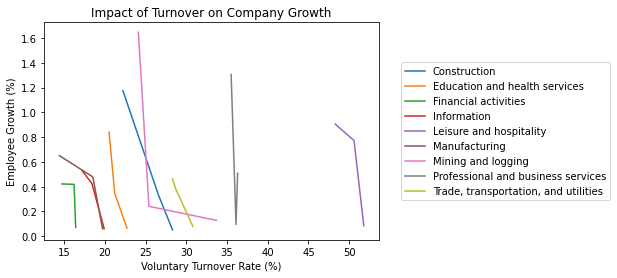

In [44]:
filt = df_raw['bls_industry']!='Other services'
keys = ['dataset_id','year']
df_tmp = df_raw[filt].groupby(keys)['date_updated'].max().reset_index()
df_link = df_tmp.join(df_raw[filt].set_index(keys+['date_updated']), on=keys+['date_updated'])
df_bls_clean['bls_industry'] = df_bls_clean['Industry'].map(lambda x : industry_map[int(x)])

# Calculate 
grp = df_link.groupby(['bls_industry','year'])
# df = grp['followers_count'].agg('sum').reset_index()
# df = df.rename(columns={'followers_count':'n_followers'})
# df['follower_growth'] = df.groupby('bls_industry')['n_followers'].diff()
# df['follower_growth_perc'] = df.groupby('bls_industry')['n_followers'].pct_change()

df = grp['employees_on_platform'].agg('sum').reset_index()
df = df.rename(columns={'employees_on_platform':'n_employees'})
df['company_growth'] = df.groupby('bls_industry')['n_employees'].diff()
df['company_growth_perc'] = df.groupby('bls_industry')['n_employees'].pct_change()

#df['n_employees'] = grp['employees_on_platform'].agg('sum')
#df['scaled_followers'] = df['n_followers'] / df['n_employees']

filt = ((df_bls_clean['Seasonal']     == 'U' )
      & (df_bls_clean['period']       == 'M13')
      & (df_bls_clean['year']         >= 2015)
      & (df_bls_clean['year']         <= 2018)
      & (df_bls_clean['Rate/Level']   == 'R')
      & (df_bls_clean['Data Element'] == 'QU')
      & (df_bls_clean['Industry'].isin(PRIVATE_IND)))
keys = ['bls_industry','year'] 
other = df_bls_clean.loc[filt, keys+['value']].set_index(keys) 
df = df.join(other, on=keys).dropna().rename(columns={'value':'turnover'})
display(df)

# Scatter Plot of Industry Turnover vs. (Normalized) Follower Count or Company Growth
#ax = sns.lineplot(data=df, x='turnover', y='follower_growth_perc', hue='bls_industry')
ax = sns.lineplot(data=df, x='turnover', y='company_growth_perc', hue='bls_industry')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='center left', bbox_to_anchor=(1.05,0.5), ncol=1)
ax.set_ylabel('Employee Growth (%)')
ax.set_xlabel('Voluntary Turnover Rate (%)')
ax.set_title('Impact of Turnover on Company Growth')
plt.show()